<a href="https://colab.research.google.com/github/gitmystuff/INFO5737/blob/main/UNSW_NB15_Isolation_Forest_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UNSW_NB15 Isolation Forest I

https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15

## The Threats

**Fuzzers:** Imagine throwing a bunch of random inputs at a program to see what breaks. That's essentially what fuzzers do. They are automated tools that feed applications with malformed, unexpected, or random data to identify coding errors, security vulnerabilities, and potential crash points. Think of it as a stress test for software.

**Analysis:** In the context of cybersecurity, analysis involves examining data, systems, and network traffic to understand what's happening, identify threats, and assess vulnerabilities. This could involve looking at log files to detect suspicious activity, reverse-engineering malware to understand its functionality, or analyzing network packets to identify attack patterns. It's about understanding the "why" and "how" behind security events.

**Backdoors:** A backdoor is a secret method of bypassing normal authentication or security controls to gain unauthorized access to a system, network, or application. It's like having a hidden entrance that allows someone to sneak in without going through the front door. Backdoors can be intentionally built in by developers (often for legitimate maintenance purposes but sometimes maliciously) or can be created by attackers after compromising a system.

**Denial of Service (DoS):** A Denial of Service attack aims to disrupt the normal functioning of a computer system, network, or service, making it unavailable to legitimate users. This is often achieved by overwhelming the target with a flood of traffic or requests, consuming its resources (like bandwidth, CPU, or memory) until it can no longer respond. A Distributed Denial of Service (DDoS) attack uses multiple compromised computers (a botnet) to launch the attack, making it even harder to defend against.

**Exploits:** An exploit is a piece of code, a technique, or a sequence of commands that takes advantage of a vulnerability in software or hardware to cause unintended or unanticipated behavior. This could range from crashing an application to gaining complete control over a system. Think of it as finding a flaw in a wall (the vulnerability) and using a tool (the exploit) to break through it.

**Generic:** In cybersecurity, "generic" often refers to something that is not specific to a particular vulnerability or target. For example, a generic exploit might work against a range of similar software versions, or a generic detection signature might identify a broad category of malware behavior rather than a specific piece of malware.

**Reconnaissance:** This is the initial phase of an attack where the attacker gathers information about the target system, network, or organization. It's like a spy doing their homework before a mission. This can involve passive techniques like scanning public websites and social media or more active techniques like network scanning to identify open ports and services. The goal is to understand the target's defenses and identify potential weaknesses.

**Shellcode:** Shellcode is a small piece of machine code that attackers inject into a vulnerable application or system. When executed, it typically provides the attacker with a command-line shell, allowing them to execute arbitrary commands on the compromised system. It's the payload of many exploits, giving the attacker direct control.

**Worms:** A worm is a self-replicating malware program that can spread across a network without requiring any action from a user. Unlike viruses, which need to attach themselves to a host program, worms are standalone and can propagate automatically by exploiting vulnerabilities in operating systems or applications. They can consume bandwidth, overload systems, and often carry malicious payloads.

## The Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def google_sheet(url):
  url='https://drive.google.com/uc?id=' + url.split('/')[-2]
  return url

# --- 1. Load the Dataset ---
# https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15
try:
    # train_df = pd.read_csv('UNSW_NB15_training-set.csv')
    # test_df = pd.read_csv('UNSW_NB15_testing-set.csv')
    train_df = pd.read_csv(google_sheet('https://drive.google.com/file/d/1vNWeknjiQ6W20h5SOD4Uwqal7cG_Vo9N/view?usp=sharing'))
    test_df = pd.read_csv(google_sheet('https://drive.google.com/file/d/1f0q5X3_yXh1E2lGB5aFQABdXz8h7PN4B/view?usp=sharing'))

except FileNotFoundError:
    print("Error: Make sure 'UNSW_NB15_training-set.csv' and 'UNSW_NB15_testing-set.csv' are in the current directory.")
    exit()

# Combine training and testing data for initial preprocessing (optional, but can be useful)
combined_df = pd.concat([train_df, test_df], ignore_index=True)

## Preprocessing

In [ ]:
# --- 2. Preprocessing ---

# Drop the 'id' column as it's not a useful feature
combined_df = combined_df.drop('id', axis=1)

print(combined_df.shape)
print(combined_df.info())
combined_df.head()

(257673, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  fl

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


Anomaly Detection Results:
Accuracy: 0.3598525274085573
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.98      0.53     18675
           1       0.36      0.01      0.01     32860

    accuracy                           0.36     51535
   macro avg       0.36      0.49      0.27     51535
weighted avg       0.36      0.36      0.20     51535

Confusion Matrix:
[[18370   305]
 [32685   175]]


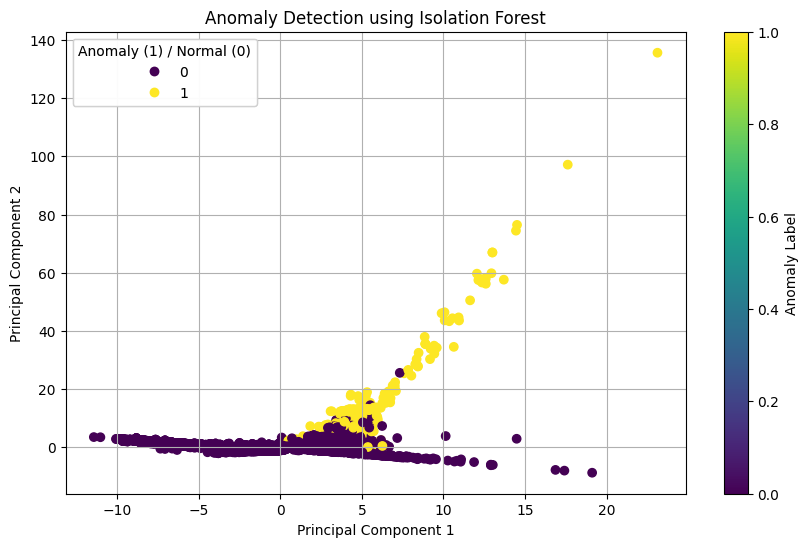

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load the UNSW-NB15 dataset
data = combined_df

# Preprocessing
# 1. Separate features (X) and labels (y)
X = data.drop(["attack_cat", "label"], axis=1, errors='ignore')  # Drop both detailed and binary labels
y = data["label"] if "label" in data.columns else None # Use binary label if available

# 2. Identify numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# 3. Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

# 4. Split data
if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
else:
    X_train, X_test = train_test_split(X_processed, test_size=0.2, random_state=42)

# Model Training
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_forest.fit(X_train)

# Anomaly Detection
anomaly_predictions = iso_forest.predict(X_test)
anomaly_labels = np.where(anomaly_predictions == 1, 0, 1)  # 0: normal, 1: anomaly

# Evaluation
if y is not None:
    print("Anomaly Detection Results:")
    print(f"Accuracy: {accuracy_score(y_test, anomaly_labels)}")
    print("Classification Report:")
    print(classification_report(y_test, anomaly_labels))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, anomaly_labels))

# Visualization (if you reduce dimensions to 2)
from sklearn.decomposition import PCA

if X_test.shape[1] > 2:
    pca = PCA(n_components=2)
    X_test_2d = pca.fit_transform(X_test)

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=anomaly_labels, cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Anomaly Detection using Isolation Forest')
    legend1 = plt.legend(*scatter.legend_elements(), title="Anomaly (1) / Normal (0)")
    plt.gca().add_artist(legend1)
    plt.colorbar(scatter, label='Anomaly Label')
    plt.grid(True)
    plt.show()

In [ ]:
# Handle categorical features
categorical_features = combined_df.select_dtypes(include=['object']).columns
for col in categorical_features:
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col])

# Separate features (X) and target (y)
X = combined_df.drop(['label', 'attack_cat'], axis=1) # 'label' is binary (0: normal, 1: attack), 'attack_cat' is specific attack type
y_binary = combined_df['label']
y_multiclass = combined_df['attack_cat']

# Split data into training and testing sets (if you didn't load separate sets)
X_train, X_test, y_train_binary, y_test_binary, y_train_multiclass, y_test_multiclass = train_test_split(
    X, y_binary, y_multiclass, test_size=0.2, random_state=42, stratify=y_binary
)

**1. `train_test_split` Function:**

   * `from sklearn.model_selection import train_test_split`: This import statement makes the function available.
   * `train_test_split()`: This function takes one or more datasets and splits them into two parts: a training set and a testing set. This is a crucial step in machine learning to evaluate how well a model generalizes to unseen data.

**2. Input Arguments:**

   * `X`: This is your feature data. It's a Pandas DataFrame (or a NumPy array) containing the independent variables that you'll use to train your models.
   * `y_binary`: This is your first target variable. It's likely a Pandas Series or NumPy array representing a binary classification problem (e.g., 0 for "normal", 1 for "attack").
   * `y_multiclass`: This is your second target variable. It's also a Pandas Series or NumPy array, but it represents a multi-class classification problem (e.g., different types of attacks like "DoS", "Probe", "Exploit").
   * `test_size=0.2`: This specifies that 20% of your data should be used for the testing set, and the remaining 80% will be used for the training set.
   * `random_state=42`: This sets a seed for the random number generator used by the function. Using a consistent `random_state` ensures that you get the same split every time you run the code. This is important for reproducibility.
   * `stratify=y_binary`: This is a very important argument. It ensures that the training and testing sets have the same *proportion* of classes as the original dataset, but it is applied to the y_binary dataset. This is particularly useful for imbalanced datasets (where one class is much more frequent than others) to prevent the model from being biased towards the majority class.

**3. Output Variables:**

  * `X_train`: The portion of the feature data `X` that will be used for training.
  * `X_test`: The portion of the feature data `X` that will be used for testing.
  * `y_train_binary`: The portion of the binary target variable `y_binary` that corresponds to `X_train` (used for binary classification).
  * `y_test_binary`: The portion of the binary target variable `y_binary` that corresponds to `X_test`.
  * `y_train_multiclass`: The portion of the multi-class target variable `y_multiclass` that corresponds to `X_train` (used for multi-class classification).
  * `y_test_multiclass`: The portion of the multi-class target variable `y_multiclass` that corresponds to `X_test`.

**Important Considerations:**

   * **Stratification:** Stratification is applied based on `y_binary`, which means the proportion of "normal" and "attack" labels will be the same in the training and testing sets. This is a good practice because it helps to ensure that your model is trained and evaluated on a balanced representation of both classes.
   * **Data Consistency:** It's crucial that `X_train`, `y_train_binary`, and `y_train_multiclass` all contain data from the same rows of your original dataset. Similarly, `X_test`, `y_test_binary`, and `y_test_multiclass` should also align. `train_test_split` handles this correctly, ensuring the corresponding rows are kept together.

In summary, this line of code efficiently splits your feature data and two different target variables into training and testing sets, using stratification to maintain class balance for the binary target.

In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrames (optional, for easier handling later)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Anomaly Detection Using Isolation Forest


--- Anomaly Detection using Isolation Forest ---
Anomaly Detection Results:
Accuracy: 0.3682157756864267
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.96      0.52     18600
           1       0.60      0.04      0.07     32935

    accuracy                           0.37     51535
   macro avg       0.48      0.50      0.29     51535
weighted avg       0.51      0.37      0.23     51535

Confusion Matrix:
[[17809   791]
 [31768  1167]]


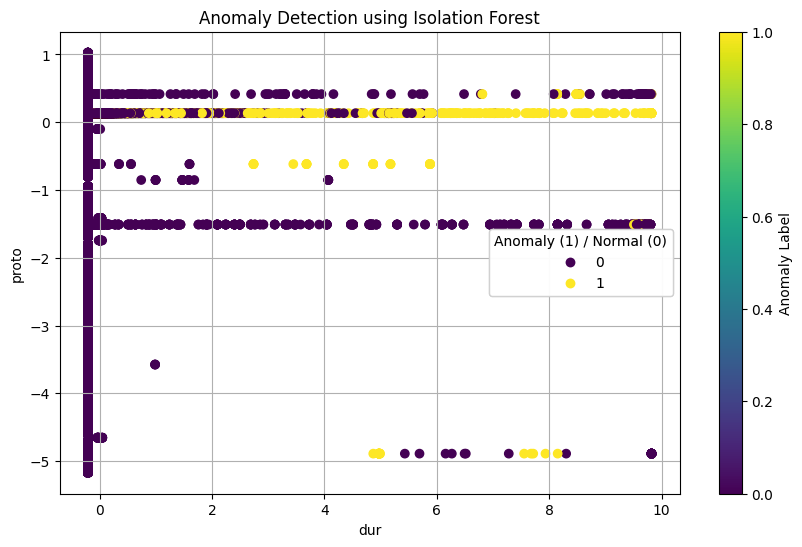

In [ ]:
# --- 3. Anomaly Detection using Isolation Forest ---

print("\n--- Anomaly Detection using Isolation Forest ---")

# Train Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_forest.fit(X_train_scaled)

# Predict anomalies on the test set
anomaly_predictions = iso_forest.predict(X_test_scaled)

# Convert predictions to binary labels (1 for inlier, -1 for outlier) to (0 for normal, 1 for anomaly)
anomaly_labels = np.where(anomaly_predictions == 1, 0, 1)

print("Anomaly Detection Results:")
print(f"Accuracy: {accuracy_score(y_test_binary, anomaly_labels)}")
print("Classification Report:")
print(classification_report(y_test_binary, anomaly_labels))
print("Confusion Matrix:")
print(confusion_matrix(y_test_binary, anomaly_labels))

# Visualize anomaly detection results (optional, for 2D representation)
if X_test_scaled.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_test_scaled.iloc[:, 0], X_test_scaled.iloc[:, 1], c=anomaly_labels, cmap='viridis')
    plt.xlabel(X_test_scaled.columns[0])
    plt.ylabel(X_test_scaled.columns[1])
    plt.title('Anomaly Detection using Isolation Forest')
    legend1 = plt.legend(*scatter.legend_elements(), title="Anomaly (1) / Normal (0)")
    plt.gca().add_artist(legend1)
    plt.colorbar(scatter, label='Anomaly Label')
    plt.grid(True)
    plt.show()


**Chart Type:**

The chart is a scatter plot.

**Axes:**

* **X-axis:** Labeled "dur". This likely represents the duration of network connections or flows.
* **Y-axis:** Labeled "proto". This is likely a numerical representation of network protocols (e.g., TCP, UDP, ICMP). It's important to note that the y-axis is treated as a continuous scale, which might not be entirely appropriate for categorical data like protocol types.

**Data Points:**

* Each dot on the chart represents a data point, which likely corresponds to a network connection or flow.
* **Color Coding:** The dots are colored in two distinct colors: dark purple (0) and yellow (1). This color coding is explained in the legend:
    * **0 (Dark Purple):** Represents "Normal" data points.
    * **1 (Yellow):** Represents "Anomalous" data points.

**Color Bar:**

* A vertical color bar is present on the right side of the chart.
* It's labeled "Anomaly Label" and ranges from 0.0 to 1.0.
* It seems to be a continuous representation of the anomaly label, even though the legend indicates discrete categories (0 and 1). This could be an artifact of the plotting or a way to visualize the "probability" or "confidence" of the anomaly classification, though it's not explicitly stated.

**Additional Information:**

* In the bottom right corner, there's text indicating "1m 4s completed at 9:16 AM". This likely refers to the execution time and completion time of the anomaly detection process.

**Interpretation of the Relationships:**

* **"proto" Axis Pattern:** The "proto" axis shows distinct bands or levels where data points are concentrated. This suggests that the numerical representation of protocols creates discrete clusters. The clustering of points at specific "proto" values is significant.
* **"dur" Axis Pattern:** The "dur" axis shows a range of durations, with many points clustered at lower durations and fewer at higher durations. This is typical in network traffic, where many connections are short-lived, and fewer are long-lasting.
* **Anomaly Distribution:**
    * Anomalies (yellow) are present across a range of "dur" values.
    * Anomalies are more dispersed across the "proto" values compared to normal data.
    * At some "proto" values, there is a clear separation between normal and anomalous data. At others, there is overlap.
* **Color Bar Interpretation:**
    * The color bar suggests that the anomaly label is not strictly binary. There are nuances in the color gradient, which might indicate varying degrees of "anomalousness" assigned by the Isolation Forest.
    * The transition from purple to yellow color might represent an anomaly score or a probability of being an anomaly.

**Overall, the chart visually depicts the results of anomaly detection, showing how anomalies are distributed across different protocol types (represented by "proto") and connection durations ("dur"). It highlights that anomalies often have different patterns compared to normal connections.**

**Step-by-Step Explanation:**

1.  **Section Header:**

    ```python
    # --- 3. Anomaly Detection using Isolation Forest ---

    print("\n--- Anomaly Detection using Isolation Forest ---")
    ```

    * These lines are comments and a `print` statement to clearly mark the beginning of the anomaly detection part of the code, making it easier to follow.

2.  **Train Isolation Forest Model:**

    ```python
    iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
    iso_forest.fit(X_train_scaled)
    ```

    * `iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)`:
        * This line creates an instance of the `IsolationForest` class from the `sklearn.ensemble` library. `IsolationForest` is an unsupervised learning algorithm that efficiently identifies anomalies by isolating outliers in random partitions.
        * `n_estimators=100`: This parameter specifies that the Isolation Forest will consist of 100 isolation trees. More trees generally improve accuracy but also increase computational cost.
        * `contamination='auto'`: This is an important parameter. It estimates the proportion of outliers in the dataset. Setting it to 'auto' allows the algorithm to determine a reasonable default threshold. You can also provide a float value (between 0 and 0.5) if you have an estimate of the outlier percentage.
        * `random_state=42`: This sets the random seed for the algorithm. Using a fixed `random_state` ensures that you get the same results each time you run the code, which is helpful for reproducibility.
    * `iso_forest.fit(X_train_scaled)`:
        * This line trains the `iso_forest` model on the scaled training data (`X_train_scaled`). The model learns the normal patterns in the data by constructing isolation trees.

3.  **Predict Anomalies on the Test Set:**

    ```python
    anomaly_predictions = iso_forest.predict(X_test_scaled)
    ```

    * `iso_forest.predict(X_test_scaled)`:
        * This line uses the trained `iso_forest` model to predict whether each data point in the scaled test set (`X_test_scaled`) is an anomaly or not.
        * The `predict()` method returns:
            * `1` for data points that are considered "normal" (inliers).
            * `-1` for data points that are considered anomalies (outliers).
    * `anomaly_predictions = ...`:
        * The returned predictions (1 or -1) are stored in the `anomaly_predictions` variable.

4.  **Convert Predictions to Binary Labels (0 and 1):**

    ```python
    anomaly_labels = np.where(anomaly_predictions == 1, 0, 1)
    ```

    * This line converts the anomaly predictions from 1/-1 to 0/1. This is done to align the labels with the `y_test_binary` labels, which are likely 0 and 1.
        * `np.where(anomaly_predictions == 1, 0, 1)`:
            * This is a NumPy function that acts like a vectorized if-else statement.
            * `anomaly_predictions == 1`:  Creates a boolean array that is `True` where `anomaly_predictions` is 1 (normal) and `False` where it is -1 (anomaly).
            * `0, 1`: These are the values to use for the output. Where the condition is `True` (normal), it assigns `0`; where the condition is `False` (anomaly), it assigns `1`.
    * `anomaly_labels = ...`:
        * The converted labels (0 or 1) are stored in the `anomaly_labels` variable.

5.  **Print Anomaly Detection Results:**

    ```python
    print("Anomaly Detection Results:")
    print(f"Accuracy: {accuracy_score(y_test_binary, anomaly_labels)}")
    print("Classification Report:")
    print(classification_report(y_test_binary, anomaly_labels))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_binary, anomaly_labels))
    ```

    * These lines print various evaluation metrics to assess the performance of the anomaly detection:
        * `accuracy_score(y_test_binary, anomaly_labels)`: Calculates the accuracy, which is the proportion of correctly classified data points. It's important to note that accuracy can be misleading for anomaly detection, especially with imbalanced datasets (where there are many more normal points than anomalies).
        * `classification_report(y_test_binary, anomaly_labels)`: Generates a classification report, which provides precision, recall, F1-score, and support for each class. These metrics give a more detailed view of the classification performance.
        * `confusion_matrix(y_test_binary, anomaly_labels)`: Creates a confusion matrix, which shows the number of true positives, true negatives, false positives, and false negatives.

6.  **Visualize Anomaly Detection Results (Optional):**

    ```python
    if X_test_scaled.shape[1] >= 2:
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(X_test_scaled.iloc[:, 0], X_test_scaled.iloc[:, 1], c=anomaly_labels, cmap='viridis')
        plt.xlabel(X_test_scaled.columns[0])
        plt.ylabel(X_test_scaled.columns[1])
        plt.title('Anomaly Detection using Isolation Forest')
        legend1 = plt.legend(*scatter.legend_elements(), title="Anomaly (1) / Normal (0)")
        plt.gca().add_artist(legend1)
        plt.colorbar(scatter, label='Anomaly Label')
        plt.grid(True)
        plt.show()
    ```

    * This part of the code is executed only if the scaled test data has at least two features (columns).
        * `X_test_scaled.shape[1] >= 2`: Checks the number of columns in `X_test_scaled`.
        * `plt.figure(figsize=(10, 6))`: Creates a new figure for the plot.
        * `scatter = plt.scatter(X_test_scaled.iloc[:, 0], X_test_scaled.iloc[:, 1], c=anomaly_labels, cmap='viridis')`: Creates a scatter plot:
            * `X_test_scaled.iloc[:, 0]`:  Selects the first column of the scaled test data for the x-axis.
            * `X_test_scaled.iloc[:, 1]`:  Selects the second column of the scaled test data for the y-axis.
            * `c=anomaly_labels`: Colors the data points based on the `anomaly_labels` (0 or 1).
            * `cmap='viridis'`: Uses the 'viridis' colormap.
        * `plt.xlabel(...)`, `plt.ylabel(...)`, `plt.title(...)`:  Sets the axis labels and plot title.
        * `legend1 = plt.legend(*scatter.legend_elements(), title="Anomaly (1) / Normal (0)")`: Creates a legend for the scatter plot.
        * `plt.gca().add_artist(legend1)`: Adds the legend to the current axes.
        * `plt.colorbar(scatter, label='Anomaly Label')`: Adds a colorbar to the plot.
        * `plt.grid(True)`: Adds a grid to the plot.
        * `plt.show()`: Displays the plot.

**In summary, this code block performs the following:**

1.  Trains an Isolation Forest model on the scaled training data.
2.  Uses the trained model to predict anomalies in the scaled test data.
3.  Converts the anomaly predictions to binary labels (0 and 1).
4.  Evaluates the performance of the anomaly detection using accuracy, classification report, and confusion matrix.
5.  (Optionally) Visualizes the anomaly detection results with a scatter plot if the data has at least two features.

## Intrusion Detection (Binary Classification) Using Random Forest


--- Binary Intrusion Detection using Random Forest ---
Binary Intrusion Detection Results (Normal vs. Attack):
Accuracy: 0.9524983021247696
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     18600
           1       0.96      0.96      0.96     32935

    accuracy                           0.95     51535
   macro avg       0.95      0.95      0.95     51535
weighted avg       0.95      0.95      0.95     51535

Confusion Matrix:
[[17429  1171]
 [ 1277 31658]]


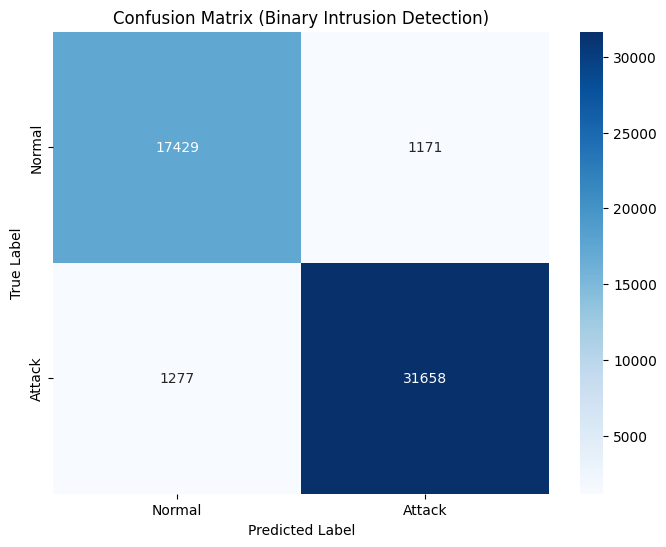

In [ ]:
# --- 4. Intrusion Detection (Binary Classification) using Random Forest ---

print("\n--- Binary Intrusion Detection using Random Forest ---")

# Train a Random Forest classifier for binary classification (Normal vs. Attack)
rf_binary = RandomForestClassifier(n_estimators=100, random_state=42)
rf_binary.fit(X_train_scaled, y_train_binary)

# Predict on the test set
binary_predictions = rf_binary.predict(X_test_scaled)

print("Binary Intrusion Detection Results (Normal vs. Attack):")
print(f"Accuracy: {accuracy_score(y_test_binary, binary_predictions)}")
print("Classification Report:")
print(classification_report(y_test_binary, binary_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test_binary, binary_predictions))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_binary, binary_predictions), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Binary Intrusion Detection)')
plt.show()

## Intrusion Detection (Multi-Class Classification) Using Random Forest


--- Multi-class Intrusion Detection using Random Forest ---
Multi-class Intrusion Detection Results (Attack Categories):
Accuracy: 0.829824391190453
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.11      0.20       526
           1       0.87      0.09      0.17       475
           2       0.34      0.27      0.30      3201
           3       0.64      0.81      0.72      8980
           4       0.70      0.62      0.66      4757
           5       1.00      0.98      0.99     11851
           6       0.92      0.95      0.93     18600
           7       0.93      0.76      0.84      2820
           8       0.65      0.63      0.64       293
           9       0.50      0.12      0.20        32

    accuracy                           0.83     51535
   macro avg       0.74      0.54      0.56     51535
weighted avg       0.83      0.83      0.82     51535

Confusion Matrix:


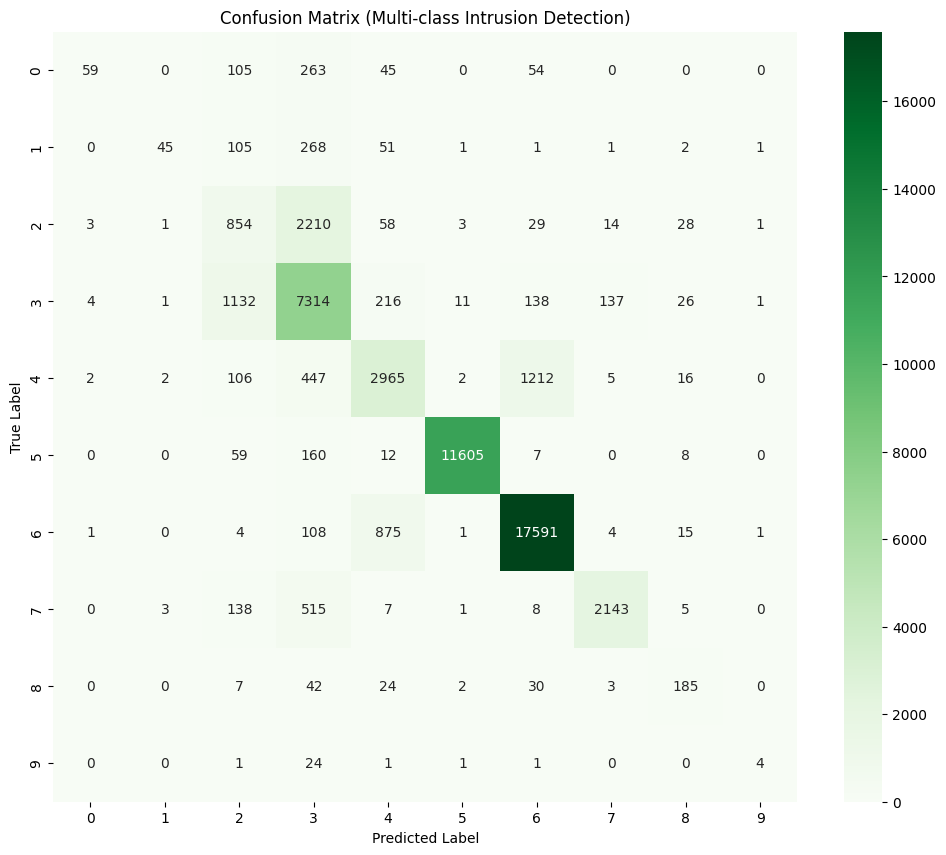

In [ ]:
# --- 5. Intrusion Detection (Multi-class Classification) using Random Forest ---

print("\n--- Multi-class Intrusion Detection using Random Forest ---")

# Train a Random Forest classifier for multi-class classification (specific attack categories)
# Note: Ensure you have enough data per class for good performance.
rf_multiclass = RandomForestClassifier(n_estimators=100, random_state=42)
rf_multiclass.fit(X_train_scaled, y_train_multiclass)

# Predict on the test set
multiclass_predictions = rf_multiclass.predict(X_test_scaled)

print("Multi-class Intrusion Detection Results (Attack Categories):")
print(f"Accuracy: {accuracy_score(y_test_multiclass, multiclass_predictions)}")
print("Classification Report:")
print(classification_report(y_test_multiclass, multiclass_predictions))
print("Confusion Matrix:")
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test_multiclass, multiclass_predictions), annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y_test_multiclass), yticklabels=np.unique(y_test_multiclass))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Multi-class Intrusion Detection)')
plt.show()

<div class="md-recitation">
  Sources
  <ol>
  <li><a href="https://wenku.csdn.net/answer/730d988fc9cd4a228926eef5a644ebf4">https://wenku.csdn.net/answer/730d988fc9cd4a228926eef5a644ebf4</a></li>
  <li><a href="https://github.com/prabashdpp/anomaly_detection">https://github.com/prabashdpp/anomaly_detection</a></li>
  <li><a href="https://www.atyun.com/59072.html">https://www.atyun.com/59072.html</a></li>
  <li><a href="https://www.kaggle.com/code/muhammadibrahimqasmi/decoding-online-sales-eda-ml-mastery">https://www.kaggle.com/code/muhammadibrahimqasmi/decoding-online-sales-eda-ml-mastery</a></li>
  <li><a href="https://www.analyticsvidhya.com/blog/2022/10/understand-the-concept-of-standardization-in-machine-learning/">https://www.analyticsvidhya.com/blog/2022/10/understand-the-concept-of-standardization-in-machine-learning/</a></li>
  <li><a href="https://github.com/Vigneshgec/Aquatic_Monitering_Using_DL">https://github.com/Vigneshgec/Aquatic_Monitering_Using_DL</a></li>
  </ol>
</div>